In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats

In [29]:
genes = pd.read_csv("hg19.refGene.gtf",sep="\t",header=None)

In [30]:
region=("chr1",1000000,2000000)
genes_1mb = genes.loc[(genes[0]=="chr1")&(genes[3]<region[2])&(genes[4]>region[1])]
genes_1mb

,0,1,2,3,4,5,6,7,8
507,chr1,refGene,transcript,995114,1001833,.,+,.,"gene_id ""LOC100288175""; transcript_id ""NR_1489..."
511,chr1,refGene,exon,1001210,1001833,.,+,.,"gene_id ""LOC100288175""; transcript_id ""NR_1489..."
554,chr1,refGene,transcript,1072397,1079434,.,+,.,"gene_id ""LINC01342""; transcript_id ""NR_038869""..."
555,chr1,refGene,exon,1072397,1072490,.,+,.,"gene_id ""LINC01342""; transcript_id ""NR_038869""..."
556,chr1,refGene,exon,1076205,1076412,.,+,.,"gene_id ""LINC01342""; transcript_id ""NR_038869""..."
...,...,...,...,...,...,...,...,...,...
1685627,chr1,refGene,exon,1709728,1709909,.,-,.,"gene_id ""NADK""; transcript_id ""NM_001353642""; ..."
1685628,chr1,refGene,5UTR,1709728,1709909,.,-,.,"gene_id ""NADK""; transcript_id ""NM_001353642""; ..."
1685629,chr1,refGene,start_codon,1688749,1688749,.,-,0,"gene_id ""NADK""; transcript_id ""NM_001353642""; ..."
1685630,chr1,refGene,start_codon,1693330,1693331,.,-,2,"gene_id ""NADK""; transcript_id ""NM_001353642""; ..."


In [31]:

genes_1mb

/Users/he/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,0,1,2,3,4,5,6,7,8,name,transcript
507,chr1,refGene,transcript,995114,1001833,.,+,.,"gene_id ""LOC100288175""; transcript_id ""NR_1489...",LOC100288175,"transcript_id ""NR_148960"""
511,chr1,refGene,exon,1001210,1001833,.,+,.,"gene_id ""LOC100288175""; transcript_id ""NR_1489...",LOC100288175,"transcript_id ""NR_148960"""
554,chr1,refGene,transcript,1072397,1079434,.,+,.,"gene_id ""LINC01342""; transcript_id ""NR_038869""...",LINC01342,"transcript_id ""NR_038869"""
555,chr1,refGene,exon,1072397,1072490,.,+,.,"gene_id ""LINC01342""; transcript_id ""NR_038869""...",LINC01342,"transcript_id ""NR_038869"""
556,chr1,refGene,exon,1076205,1076412,.,+,.,"gene_id ""LINC01342""; transcript_id ""NR_038869""...",LINC01342,"transcript_id ""NR_038869"""
...,...,...,...,...,...,...,...,...,...,...,...
1685627,chr1,refGene,exon,1709728,1709909,.,-,.,"gene_id ""NADK""; transcript_id ""NM_001353642""; ...",NADK,"transcript_id ""NM_001353642"""
1685628,chr1,refGene,5UTR,1709728,1709909,.,-,.,"gene_id ""NADK""; transcript_id ""NM_001353642""; ...",NADK,"transcript_id ""NM_001353642"""
1685629,chr1,refGene,start_codon,1688749,1688749,.,-,0,"gene_id ""NADK""; transcript_id ""NM_001353642""; ...",NADK,"transcript_id ""NM_001353642"""
1685630,chr1,refGene,start_codon,1693330,1693331,.,-,2,"gene_id ""NADK""; transcript_id ""NM_001353642""; ...",NADK,"transcript_id ""NM_001353642"""


In [32]:
exons = genes_1mb.loc[genes_1mb[2]=="exon",:]

In [33]:
uniq_gene_region = genes_1mb.groupby("name").agg({3:"min",4:"max",6:stats.mode})
uniq_gene_region

,3,4,6
name,,,
ACAP3,1227771,1243310,"([-], [53])"
ANKRD65,1353800,1356824,"([-], [50])"
ATAD3A,1447542,1470067,"([+], [111])"
ATAD3B,1407145,1433228,"([+], [70])"
ATAD3C,1385069,1405542,"([+], [29])"
AURKAIP1,1309116,1310587,"([-], [39])"
B3GALT6,1167617,1170420,"([+], [7])"
C1QTNF12,1177833,1182102,"([-], [21])"
C1orf159,1017203,1051469,"([-], [81])"


In [34]:
uniq_gene_region = uniq_gene_region.reset_index()
flank = 0.05 * (region[2] - region[1])
uniq_gene_region["left"]=uniq_gene_region[3]-flank
uniq_gene_region["right"]=uniq_gene_region[4]+flank
uniq_gene_region

,name,3,4,6,left,right
0,ACAP3,1227771,1243310,"([-], [53])",1177771.0,1293310.0
1,ANKRD65,1353800,1356824,"([-], [50])",1303800.0,1406824.0
2,ATAD3A,1447542,1470067,"([+], [111])",1397542.0,1520067.0
3,ATAD3B,1407145,1433228,"([+], [70])",1357145.0,1483228.0
4,ATAD3C,1385069,1405542,"([+], [29])",1335069.0,1455542.0
5,AURKAIP1,1309116,1310587,"([-], [39])",1259116.0,1360587.0
6,B3GALT6,1167617,1170420,"([+], [7])",1117617.0,1220420.0
7,C1QTNF12,1177833,1182102,"([-], [21])",1127833.0,1232102.0
8,C1orf159,1017203,1051469,"([-], [81])",967203.0,1101469.0
9,CALML6,1846699,1848735,"([+], [32])",1796699.0,1898735.0


In [35]:
stacks=[]
stack_dic={}
for index,row in uniq_gene_region.reset_index().sort_values([3]).iterrows():
    if len(stacks)==0:
        stacks.append([(row["left"],row["right"])])
        stack_dic[row["name"]] = 0
    else:
        for i in range(len(stacks)):
            for j in range(len(stacks[i])):
                # if overlap
                if (row["left"]>stacks[i][j][0] and row["left"]<stacks[i][j][1]) or (row["right"]>stacks[i][j][0] and row["right"]<stacks[i][j][1]):
                    # if not last stack : break
                    if i<len(stacks)-1:
                        break
                    # if last stack : add a new stack
                    else:
                        stacks.append([(row["left"],row["right"])])
                        stack_dic[row["name"]] = i+1
                        break
                # if no overlap       
                else:
                    # not last in a stack
                    if j<len(stacks[i])-1:
                        #if in the middle
                        if row["left"]>stacks[i][j][1] and row["right"]<stacks[i][j+1][0]:
                            stacks[i].insert(j+1,(row["left"],row["right"]))
                            stack_dic[row["name"]] = i
                            break
                    #last one in a stack
                    elif row["left"]>stacks[i][j][1]:
                        stacks[i].append((row["left"],row["right"]))
                        stack_dic[row["name"]] = i
                        break
            if row["name"] in stack_dic.keys():
                break         
uniq_gene_region["stack"] = -uniq_gene_region["name"].map(stack_dic)


In [36]:
exons["stack"] = -exons["name"].map(stack_dic)
exons

<ipython-input-36-27753d3827bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exons["stack"] = -exons["name"].map(stack_dic)


,0,1,2,3,4,5,6,7,8,name,transcript,stack
511,chr1,refGene,exon,1001210,1001833,.,+,.,"gene_id ""LOC100288175""; transcript_id ""NR_1489...",LOC100288175,"transcript_id ""NR_148960""",0
555,chr1,refGene,exon,1072397,1072490,.,+,.,"gene_id ""LINC01342""; transcript_id ""NR_038869""...",LINC01342,"transcript_id ""NR_038869""",-3
556,chr1,refGene,exon,1076205,1076412,.,+,.,"gene_id ""LINC01342""; transcript_id ""NR_038869""...",LINC01342,"transcript_id ""NR_038869""",-3
557,chr1,refGene,exon,1078119,1079434,.,+,.,"gene_id ""LINC01342""; transcript_id ""NR_038869""...",LINC01342,"transcript_id ""NR_038869""",-3
844,chr1,refGene,exon,1215816,1216046,.,+,.,"gene_id ""SCNN1D""; transcript_id ""NR_037668""; e...",SCNN1D,"transcript_id ""NR_037668""",0
...,...,...,...,...,...,...,...,...,...,...,...,...
1685618,chr1,refGene,exon,1687942,1688047,.,-,.,"gene_id ""NADK""; transcript_id ""NM_001353642""; ...",NADK,"transcript_id ""NM_001353642""",-4
1685620,chr1,refGene,exon,1688620,1688749,.,-,.,"gene_id ""NADK""; transcript_id ""NM_001353642""; ...",NADK,"transcript_id ""NM_001353642""",-4
1685622,chr1,refGene,exon,1693330,1693474,.,-,.,"gene_id ""NADK""; transcript_id ""NM_001353642""; ...",NADK,"transcript_id ""NM_001353642""",-4
1685625,chr1,refGene,exon,1696667,1696885,.,-,.,"gene_id ""NADK""; transcript_id ""NM_001353642""; ...",NADK,"transcript_id ""NM_001353642""",-4


(-56.0, 5.0)

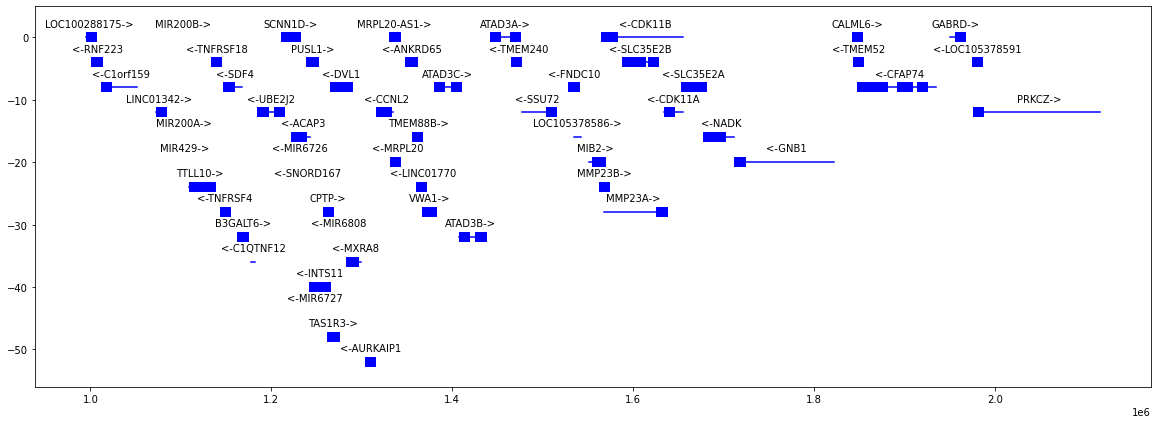

In [42]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,1,1)
for index,row in uniq_gene_region.reset_index().iterrows():
    if row[6][0]=="+":
        gene_anno = row["name"] + "->"
    else:
        gene_anno = "<-" + row["name"] 
    ax.plot((row[3],row[4]),(row["stack"]*4,row["stack"]*4),color="blue")
    ax.text(x=(row[3]+row[4])/2,y=row["stack"]*4+3,s=gene_anno,ha="center",va="top",color="black")
for index,row in exons.iterrows():
    ax.plot((row[3],row[4]),(row["stack"]*4,row["stack"]*4),linewidth=10,color="blue")
ax.set_ylim((-uniq_gene_region["stack"].nunique()*4,5))

In [1]:
import sys
sys.path.insert(0,"/Users/he/work/gwaslab/src")
import gwaslab as gl

In [2]:
mysumstats = gl.Sumstats("t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             ea="ALT",
             nea="REF",
             neaf="Frq",
             beta="BETA",
             se="SE",
             p="P",
             direction="Dir",
             n="N")

Fri Sep 16 15:51:06 2022 Start to initiate from file :t2d_bbj.txt.gz
Fri Sep 16 15:51:33 2022  -Reading columns          : SNP,ALT,REF,P,N,POS,BETA,CHR,SE,Dir,Frq
Fri Sep 16 15:51:33 2022  -Renaming columns to      : SNPID,EA,NEA,P,N,POS,BETA,CHR,SE,DIRECTION,EAF
Fri Sep 16 15:51:33 2022  -Current dataframe shape  : Rows  12557761  x  11  Columns
Fri Sep 16 15:51:37 2022  -Initiating a status column ...
Fri Sep 16 15:51:39 2022  -Reordering columns to    : SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
Fri Sep 16 15:51:40 2022  -NEAF is specified...
Fri Sep 16 15:51:40 2022  -Checking if 0<= NEAF <=1 ...
Fri Sep 16 15:51:43 2022  -Converted NEAF to EAF.
Fri Sep 16 15:51:43 2022  -Removed 0 variants with bad NEAF.
Fri Sep 16 15:51:43 2022 Finished loading data successfully!


In [3]:
mysumstats.filter_in(eq={"CHR":"7"})
mysumstats.basic_check()

Fri Sep 16 15:51:43 2022 Start filtering values:
Fri Sep 16 15:51:45 2022  -Keeping 707780 variants with CHR = 7 ...
Fri Sep 16 15:51:46 2022 Finished filtering values.
Fri Sep 16 15:51:46 2022 Start to check IDs...
Fri Sep 16 15:51:46 2022  -Current Dataframe shape : 707780  x  12
Fri Sep 16 15:51:46 2022  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Fri Sep 16 15:51:48 2022 Finished checking IDs successfully!
Fri Sep 16 15:51:48 2022 Start to fix chromosome notation...
Fri Sep 16 15:51:48 2022  -Current Dataframe shape : 707780  x  12
Fri Sep 16 15:51:50 2022  -All CHR are already fixed...
Fri Sep 16 15:51:52 2022 Finished fixing chromosome notation successfully!
Fri Sep 16 15:51:52 2022 Start to fix basepair positions...
Fri Sep 16 15:51:52 2022  -Current Dataframe shape : 707780  x  12
Fri Sep 16 15:51:53 2022  -Position upper_bound is: 250,000,000
Fri Sep 16 15:51:55 2022  -Remove outliers: 0
Fri Sep 16 15:51:55 2022  -Converted all position to datatype Int64.
Fri

In [4]:
mysumstats.get_lead()

Fri Sep 16 10:15:47 2022 Start to extract lead variants...
Fri Sep 16 10:15:47 2022  -Processing 707780 variants...
Fri Sep 16 10:15:47 2022  -Significance threshold : 5e-08
Fri Sep 16 10:15:47 2022  -Sliding window size: 500  kb
Fri Sep 16 10:15:47 2022  -Found 1077 significant variants in total...
Fri Sep 16 10:15:47 2022  -Identified 7 lead variants!
Fri Sep 16 10:15:47 2022 Finished extracting lead variants successfully!


,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
5474489,7:13888699_G_C,7,13888699,G,C,0.5680,0.0562,0.0094,2.507000e-09,191764,++++,9960099
5480067,7:14898282_C_T,7,14898282,C,T,0.6012,0.0617,0.0088,2.336000e-12,191764,++++,9960099
5626346,7:44174857_T_G,7,44174857,G,T,0.5985,-0.0640,0.0093,5.325000e-12,191764,----,9960099
5732279,7:69406661_A_T,7,69406661,T,A,0.1981,-0.0900,0.0111,4.871000e-16,191764,----,9960099
5965364,7:127253550_C_T,7,127253550,C,T,0.9081,0.2761,0.0152,4.101000e-74,191764,++++,9960099
5976830,7:130025713_G_A,7,130025713,G,A,0.9530,-0.1365,0.0230,3.068000e-09,191764,----,9960099
6092347,7:157038803_A_G,7,157038803,G,A,0.4626,-0.0502,0.0088,1.127000e-08,191764,----,9960099


Fri Sep 16 10:15:47 2022 Start to plot manhattan/qq plot with the following basic settings:
Fri Sep 16 10:15:47 2022  -Genome-wide significance level is set to 5e-08 ...
Fri Sep 16 10:15:47 2022  -Raw input contains 707780 variants...
Fri Sep 16 10:15:47 2022  -Plot layout mode is : m
Fri Sep 16 10:15:47 2022 Start conversion and QC:
Fri Sep 16 10:15:47 2022  -Removed 0 variants with nan in CHR or POS column ...
Fri Sep 16 10:15:47 2022  -Removed 0 variants with nan in P column ...
Fri Sep 16 10:15:47 2022  -P values are being converted to -log10(P)...
Fri Sep 16 10:15:47 2022  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Fri Sep 16 10:15:48 2022  -Sanity check: 0 na/inf/-inf variants will be removed...
Fri Sep 16 10:15:48 2022  -Maximum -log10(P) values is 73.38711023071251 .
Fri Sep 16 10:15:48 2022 Plotting 707741 variants:
Fri Sep 16 10:15:51 2022  -Found 7 significant variants with a sliding window size of 500 kb...
Fri Sep 16 10:15:5

(<Figure size 1500x500 with 1 Axes>, <gwaslab.Log.Log at 0x7fa9b0248e80>)

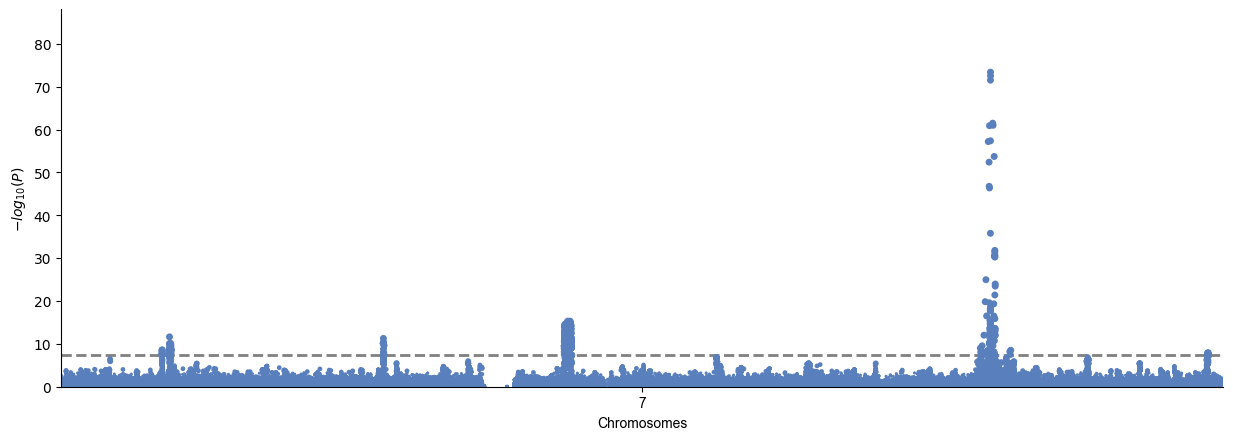

In [5]:
mysumstats.plot_mqq(mode="m")

Fri Sep 16 16:05:34 2022 Start to plot manhattan/qq plot with the following basic settings:
Fri Sep 16 16:05:34 2022  -Genome-wide significance level is set to 5e-08 ...
Fri Sep 16 16:05:34 2022  -Raw input contains 707780 variants...
Fri Sep 16 16:05:34 2022  -Plot layout mode is : r
Fri Sep 16 16:05:34 2022  -Region to plot : chr7:129825713-130225713.
Fri Sep 16 16:05:34 2022  -Extract SNPs in region : chr7:129825713-130225713...
Fri Sep 16 16:05:36 2022  -Extract SNPs in specified regions: 1253
Fri Sep 16 16:05:36 2022 Finished loading specified columns from the sumstats.
Fri Sep 16 16:05:36 2022 Start conversion and sanity check:
Fri Sep 16 16:05:36 2022  -Removed 0 variants with nan in P column ...
Fri Sep 16 16:05:36 2022  -P values are being converted to -log10(P)...
Fri Sep 16 16:05:36 2022  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Fri Sep 16 16:05:36 2022  -Sanity check: 0 na/inf/-inf variants will be removed...
Fri Sep 16 16:

(<Figure size 1500x1000 with 4 Axes>, <gwaslab.Log.Log at 0x7fbd07b3bf70>)

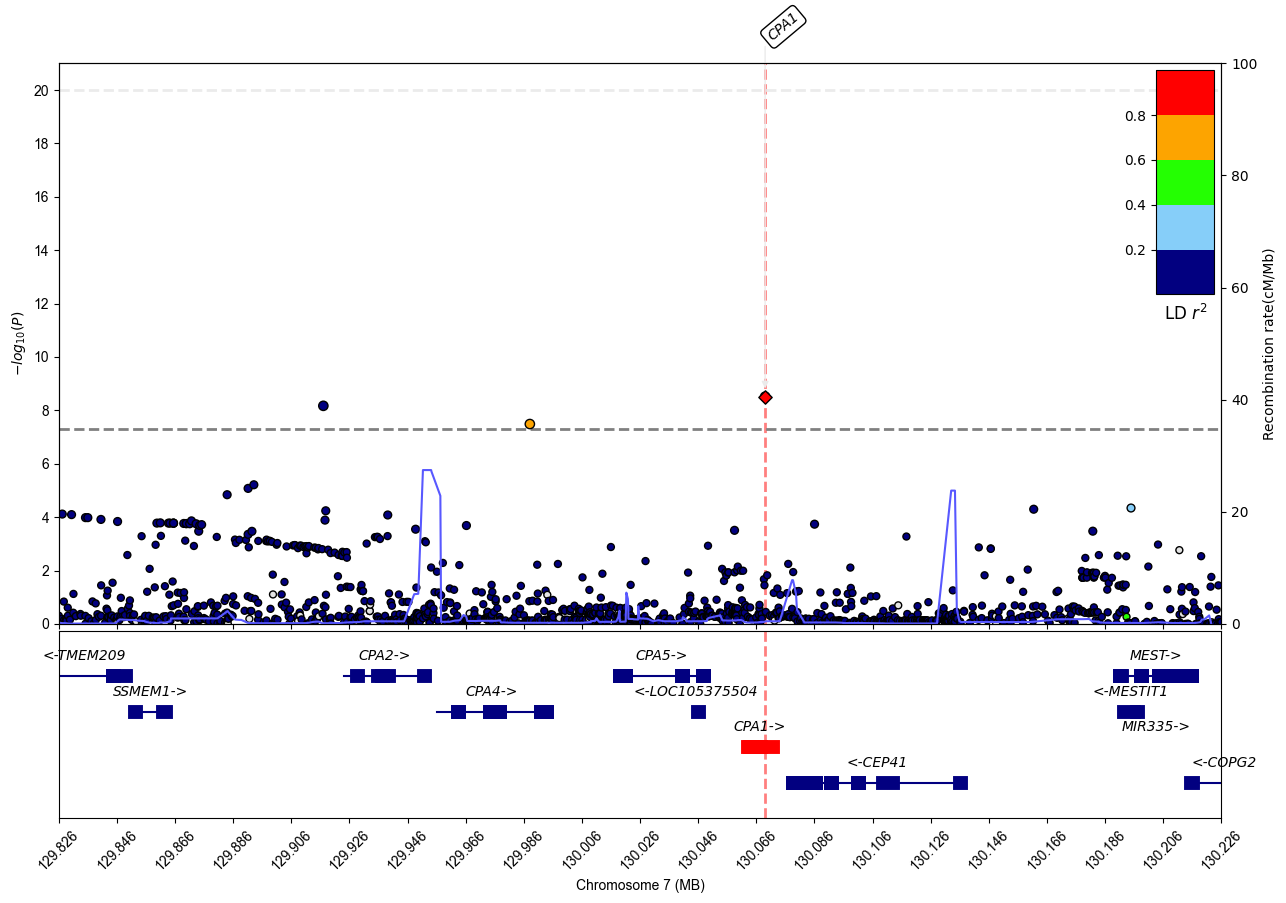

In [11]:
mysumstats.plot_mqq(snpid="SNPID",anno="GENENAME",mode="r",cut=20,region=(7,129825713,130225713),
                    vcf_path="/Users/he/Documents/Mydata/eas_1kg_af/EAS.chr7.split_norm_af.1kgp3v5.vcf.gz")

Thu Sep 15 23:29:54 2022 Start to plot manhattan/qq plot with the following basic settings:
Thu Sep 15 23:29:54 2022  -Genome-wide significance level is set to 5e-08 ...
Thu Sep 15 23:29:54 2022  -Raw input contains 707780 variants...
Thu Sep 15 23:29:54 2022  -Plot layout mode is : mqq
Thu Sep 15 23:29:54 2022  -Region to plot : chr7:127055795-127455795.
Thu Sep 15 23:29:54 2022  -Extract SNPs in region : chr7:127055795-127455795...
Thu Sep 15 23:29:56 2022  -Extract SNPs in specified regions: 1542
Thu Sep 15 23:29:56 2022 Start conversion and QC:
Thu Sep 15 23:29:56 2022  -Removed 0 variants with nan in CHR or POS column ...
Thu Sep 15 23:29:56 2022  -Removed 0 variants with nan in P column ...
Thu Sep 15 23:29:56 2022  -P values are being converted to -log10(P)...
Thu Sep 15 23:29:56 2022  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Thu Sep 15 23:29:56 2022  -Sanity check: 0 na/inf/-inf variants will be removed...
Thu Sep 15 23:29:56 2

(<Figure size 1500x500 with 2 Axes>, <gwaslab.Log.Log at 0x7fe522a49eb0>)

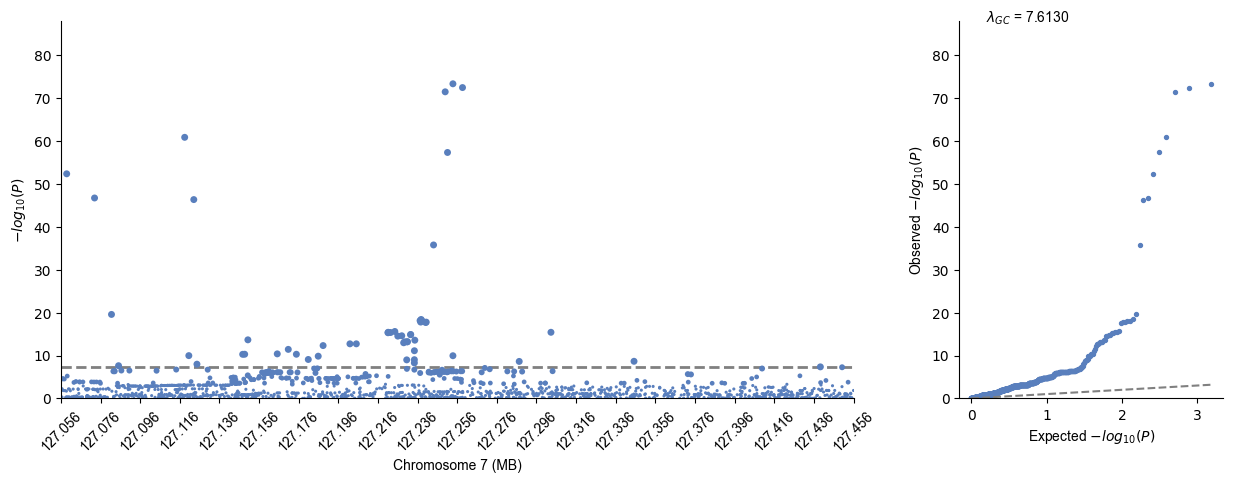

In [7]:
mysumstats.plot_mqq(mode="mqq",region=(7,127055795,127455795))

Thu Sep 15 23:29:57 2022 Start to plot manhattan/qq plot with the following basic settings:
Thu Sep 15 23:29:57 2022  -Genome-wide significance level is set to 5e-08 ...
Thu Sep 15 23:29:57 2022  -Raw input contains 707780 variants...
Thu Sep 15 23:29:57 2022  -Plot layout mode is : mqq
Thu Sep 15 23:29:57 2022 Start conversion and QC:
Thu Sep 15 23:29:57 2022  -Removed 0 variants with nan in CHR or POS column ...
Thu Sep 15 23:29:57 2022  -Removed 0 variants with nan in EAF column ...
Thu Sep 15 23:29:57 2022  -Removed 0 variants with nan in P column ...
Thu Sep 15 23:29:57 2022  -P values are being converted to -log10(P)...
Thu Sep 15 23:29:57 2022  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Thu Sep 15 23:29:57 2022  -Sanity check: 0 na/inf/-inf variants will be removed...
Thu Sep 15 23:29:57 2022  -Maximum -log10(P) values is 73.38711023071251 .
Thu Sep 15 23:29:57 2022 Plotting 707741 variants:
Thu Sep 15 23:30:01 2022  -Found 7 sign

(<Figure size 1500x500 with 2 Axes>, <gwaslab.Log.Log at 0x7fe522a49eb0>)

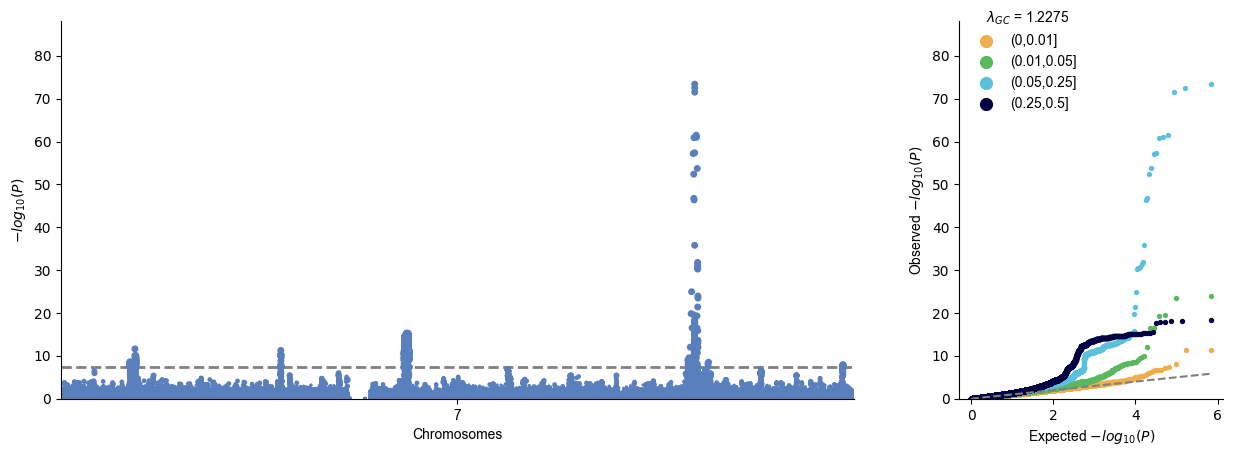

In [8]:
mysumstats.plot_mqq(mode="mqq",eaf="EAF",stratified=True)

In [4]:
mysumstats.to_format("test",fmt="ldsc")

Thu Sep 15 23:14:15 2022 Start to format the output sumstats in:  ldsc  format
Thu Sep 15 23:14:15 2022  -Formatting statistics ...
Thu Sep 15 23:14:16 2022  - Float statistics formats:
Thu Sep 15 23:14:16 2022   - Columns: ['EAF', 'BETA', 'SE', 'P']
Thu Sep 15 23:14:16 2022   - Output formats: ['{:.4g}', '{:.4f}', '{:.4f}', '{:.4e}']
Thu Sep 15 23:14:16 2022  - Start outputting sumstats in ldsc format...
Thu Sep 15 23:14:16 2022  -ldsc format will be loaded...
Thu Sep 15 23:14:16 2022  -ldsc format meta info:
Thu Sep 15 23:14:16 2022   - format_name  :  ldsc
Thu Sep 15 23:14:16 2022   - format_source  :  https://github.com/bulik/ldsc/wiki/Summary-Statistics-File-Format
Thu Sep 15 23:14:16 2022   - format_source2  :  https://github.com/bulik/ldsc/blob/master/munge_sumstats.py
Thu Sep 15 23:14:16 2022   - format_version  :  20150306
Thu Sep 15 23:14:16 2022  -gwaslab to ldsc format dictionary:
Thu Sep 15 23:14:16 2022   - gwaslab keys: ['rsID', 'NEA', 'EA', 'N', 'BETA', 'P', 'INFO', 'OR

In [6]:
mysumstats.to_format("test",fmt="ldsc",hapmap3=True,exclude_hla=True,build="38")

Thu Sep 15 23:15:12 2022 Start to format the output sumstats in:  ldsc  format
Thu Sep 15 23:15:12 2022  -Excluding variants in HLA region ...
Thu Sep 15 23:15:12 2022  -Exclude 0 variants in HLA region.
Thu Sep 15 23:15:12 2022  -Processing 707780 raw variants...
Thu Sep 15 23:15:12 2022  -Loading Hapmap3 variants data...
Thu Sep 15 23:15:13 2022  -Since rsID not in sumstats, chr:pos( build 38) will be used for matching...
Thu Sep 15 23:15:16 2022  -Raw input contains 414 hapmaps variants based on chr:pos...
Thu Sep 15 23:15:16 2022  -Extract 414 variants in Hapmap3 datasets for build 38.
Thu Sep 15 23:15:16 2022  -Formatting statistics ...
Thu Sep 15 23:15:16 2022  - Float statistics formats:
Thu Sep 15 23:15:16 2022   - Columns: ['EAF', 'BETA', 'SE', 'P']
Thu Sep 15 23:15:16 2022   - Output formats: ['{:.4g}', '{:.4f}', '{:.4f}', '{:.4e}']
Thu Sep 15 23:15:16 2022  - Start outputting sumstats in ldsc format...
Thu Sep 15 23:15:16 2022  -ldsc format will be loaded...
Thu Sep 15 23:15

In [7]:
mysumstats.summary()

Values  Percentage
Category Items                                                  
META     Row_num                              707780         NaN
         Column_num                                5         NaN
         Column_names           SNPID,EAF,P,N,STATUS         NaN
         Last_checked_time  Thu Sep 15 23:16:23 2022         NaN
MISSING  Missing_total                             0        0.00
MAF      Common                               368503       52.06
         Low_frequency                        115923       16.38
         Rare                                 222955       31.50
P        Minimum                           4.101e-74        0.00
         Significant                            1077        0.15
         Suggestive                             1688        0.24
STATUS   9960099                              644760       91.10
         9960399                               63020        8.90

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rc = pd.read_csv("/Users/he/work/gwaslab/src/gwaslab/data/recombination/genetic_map_GRCh37_chr16.txt",sep="\t")

In [4]:
rc

,Chromosome,Position(bp),Rate(cM/Mb),Map(cM)
0,chr16,84045,0.385028,0.000000
1,chr16,84170,0.496493,0.000048
2,chr16,85057,0.496790,0.000489
3,chr16,85065,0.490654,0.000492
4,chr16,85561,0.488585,0.000736
...,...,...,...,...
92989,chr16,90161292,1.093075,134.035187
92990,chr16,90161979,1.086322,134.035938
92991,chr16,90162733,1.127292,134.036757
92992,chr16,90163275,1.144804,134.037368


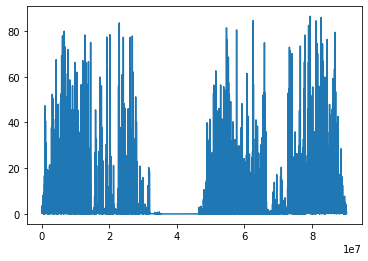

In [5]:
plt.plot(rc["Position(bp)"],rc["Rate(cM/Mb)"])